<a href="https://colab.research.google.com/github/MarkovicMartin/GITCourse/blob/main/HousingPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data fields
Here's a brief version of what you'll find in the data description file.

________________________________________________
* SalePrice - the property's sale price in dollars. This
is the target variable that you're trying to predict. 
_________________________________________________

* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import copy as copy

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/HousingPrice/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/HousingPrice/test.csv')
df_sub = pd.read_csv('/content/drive/MyDrive/HousingPrice/sample_submission.csv')

In [ ]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
X_test = df.select_dtypes(exclude=['object'])
X_test_Id = X_test[["Id"]]
X_test.drop('Id', inplace=True, axis=1)
X_test

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [ ]:


def des_object(df, varname):
    vcounts = df[varname].value_counts()
    vcounts_len = len(vcounts)
    print("")
    print("*********************************")
    print("***********")
    print(varname, "| type:",df[varname].dtype)
    print("***********")
    print(f"There are {vcounts_len} different values.")
    print(vcounts.iloc[:min(7,vcounts_len)])
    print("*********************************")
    print("")
    
def des_numeric(df, varname):
    vcounts = df[varname].value_counts()
    vcounts_len = len(vcounts)
    print("")
    print("*********************************")
    print("***********")
    print(varname, "| type:",df[varname].dtype)
    print("***********")
    print(f"There are {vcounts_len} different values.")
    print(vcounts.iloc[:min(7,vcounts_len)])
    print("***********")
    print(df[varname].describe())
    sns.histplot(df, x=varname, kde = True)
    plt.show()
    print("*********************************")
    print("")
    
def des_df(df):
    for c in df.columns:
        if df[c].dtype == object:
            des_object(df,c)
        else:
            des_numeric(df,c)
            

In [ ]:
des_df(X_test)

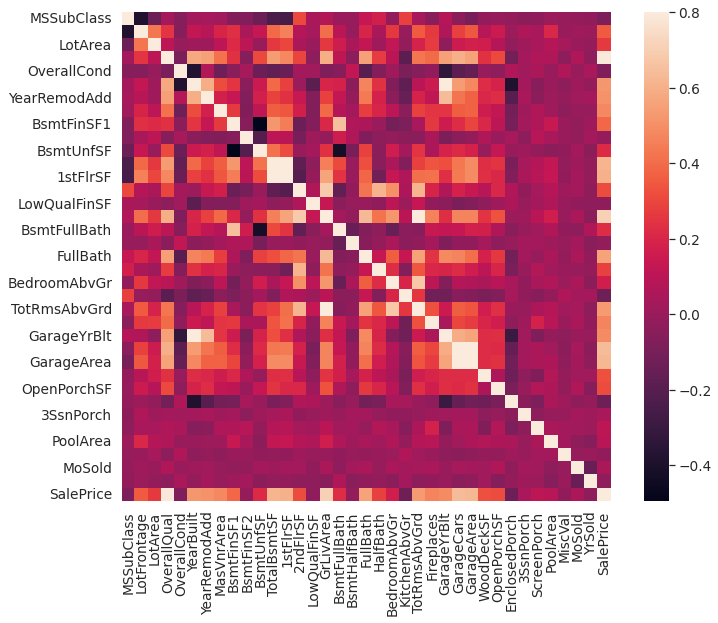

In [ ]:
#correlation matrix
corrmat = X_test.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


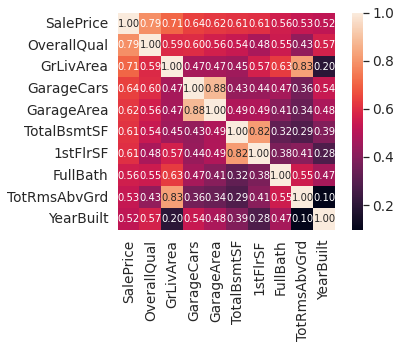

In [ ]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


In [ ]:
df.isnull().sum().sort_values(ascending = False)[0:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [ ]:
df_input = df[cols].copy()

In [ ]:
df_input

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,208500,7,1710,2,548,856,856,2,8,2003
1,181500,6,1262,2,460,1262,1262,2,6,1976
2,223500,7,1786,2,608,920,920,2,6,2001
3,140000,7,1717,3,642,756,961,1,7,1915
4,250000,8,2198,3,836,1145,1145,2,9,2000
...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,2,7,1999
1456,210000,6,2073,2,500,1542,2073,2,7,1978
1457,266500,7,2340,1,252,1152,1188,2,9,1941
1458,142125,5,1078,1,240,1078,1078,1,5,1950


# Train / fit pro lineární Regresi
Kde pracujeme pouze s 10 nejlépe korelujícími sloupci

In [ ]:
#train and fit pro trénovací a validační

y = df_input['SalePrice']
X = df_input.drop(['SalePrice'], axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print(X_Train)

      OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0               7       1710           2         548          856       856   
1               6       1262           2         460         1262      1262   
2               7       1786           2         608          920       920   
3               7       1717           3         642          756       961   
4               8       2198           3         836         1145      1145   
...           ...        ...         ...         ...          ...       ...   
1455            6       1647           2         460          953       953   
1456            6       2073           2         500         1542      2073   
1457            7       2340           1         252         1152      1188   
1458            5       1078           1         240         1078      1078   
1459            5       1256           1         276         1256      1256   

      FullBath  TotRmsAbvGrd  YearBuilt  
0        

In [ ]:
m = LinearRegression()
m.fit(X_train,y_train)

print(mean_squared_error(y_train, m.predict(X_train), squared=False))
mean_squared_error(y_val, m.predict(X_val), squared=False)

37784.11325091935


39568.64464628705

# Příprava dat na Decision Tree Regressor

In [ ]:
df_dt = df.copy()
df_dt.isnull().sum().sort_values(ascending = False)[0:3]
df_dt

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


**Drop textových a prázdných sloupců**

In [ ]:
df_dt = df.select_dtypes(exclude=['object'])
df_dt.drop('LotFrontage',inplace=True, axis=1)
df_dt.drop('GarageYrBlt',inplace=True, axis=1)
df_dt.drop('MasVnrArea',inplace=True, axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_dt.isnull().sum().sort_values(ascending = False)[0:3]

Id              0
OpenPorchSF     0
KitchenAbvGr    0
dtype: int64

In [ ]:
df_dt

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


# Decision Tree

In [ ]:
df_dt_Id = df_dt[["Id"]]
df_dt.drop('Id', inplace=True, axis=1)

In [ ]:
y_dt = df_dt['SalePrice'].copy()
X_dt = df_dt.drop(['SalePrice'], axis=1)
X_train_dt, X_val_dt, y_train_dt, y_val_dt = train_test_split(X_dt, y_dt, test_size = 0.2, random_state = 42)
m_dectree = DecisionTreeRegressor(min_samples_split=20)
m_dectree.fit(X_train_dt, y_train_dt)
print(mean_squared_error(y_train_dt, m_dectree.predict(X_train_dt), squared=False))
mean_squared_error(y_val_dt, m_dectree.predict(X_val_dt), squared=False)

# Random Forrest

In [ ]:
y_rf = df_dt['SalePrice'].copy()
X_rf = df_dt.drop(['SalePrice'], axis=1)
X_train_rf, X_val_rf, y_train_rf, y_val_rf = train_test_split(X_rf, y_rf, test_size = 0.2, random_state = 42)
m_rf = RandomForestRegressor(n_estimators=100)
m_rf.fit(X_train_rf, y_train_rf)
print(mean_squared_error(y_train_rf, m_rf.predict(X_train_rf), squared=False))
mean_squared_error(y_val_rf, m_rf.predict(X_val_rf), squared=False)

11092.160445144544


29034.974538604532

In [ ]:
X_rf

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,8450,7,5,2003,2003,706,0,150,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,9600,6,8,1976,1976,978,0,284,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,11250,7,5,2001,2002,486,0,434,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,9550,7,5,1915,1970,216,0,540,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,14260,8,5,2000,2000,655,0,490,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,460,0,40,0,0,0,0,0,8,2007
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,500,349,0,0,0,0,0,0,2,2010
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,252,0,60,0,0,0,0,2500,5,2010
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,240,366,0,112,0,0,0,0,4,2010


# Lineární regrese s daty bez Object a bez nulových hodnot

In [ ]:

y_lin = df_dt['SalePrice'].copy()
X_lin = df_dt.drop(['SalePrice'], axis=1)
X_train_lin, X_val_lin, y_train_lin, y_val_lin = train_test_split(X_lin, y_lin, test_size = 0.2, random_state = 42)
m = LinearRegression()
m.fit(X_train_lin,y_train_lin)

print(mean_squared_error(y_train_lin, m.predict(X_train_lin), squared=False))
mean_squared_error(y_val_lin, m.predict(X_val_lin), squared=False)

# Výstup 

# Podle sešidu SDA7

In [ ]:
# ??? výsledek,
X_test = df_test.select_dtypes(exclude=['object'])
X_test_Id = X_test[["Id"]]
X_test.drop('Id', inplace=True, axis=1)
X_test_Id

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [ ]:
y_pred =  m_rf.predict(X_rf)
print(y_pred.shape)
print(X_test_Id.shape)

(1460,)
(1459, 1)


In [ ]:
X_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,6,2006
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,286.0,0,24,0,0,0,0,0,4,2006
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0.0,80,32,0,0,0,0,700,7,2006


# Podle kaggle

In [ ]:
df_newsub

,Id,SalePrice
0,1,208069.00
1,2,177331.37
2,3,223015.28
3,4,151267.50
4,5,270238.93
...,...,...
1455,1456,176369.92
1456,1457,209596.50
1457,1458,253800.42
1458,1459,139162.00


úprava testovacích dat


In [ ]:
df_test_clean = df_test.select_dtypes(exclude=['object']).copy()
df_test_clean.drop('LotFrontage',inplace=True, axis=1)
df_test_clean.drop('GarageYrBlt',inplace=True, axis=1)
df_test_clean.drop('MasVnrArea',inplace=True, axis=1)

In [ ]:
df_test_clean

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,11622,5,6,1961,1961,468.0,144.0,270.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,14267,6,6,1958,1958,923.0,0.0,406.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,13830,5,5,1997,1998,791.0,0.0,137.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,9978,6,6,1998,1998,602.0,0.0,324.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,5005,8,5,1992,1992,263.0,0.0,1017.0,...,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1936,4,7,1970,1970,0.0,0.0,546.0,...,0.0,0,0,0,0,0,0,0,6,2006
1455,2916,160,1894,4,5,1970,1970,252.0,0.0,294.0,...,286.0,0,24,0,0,0,0,0,4,2006
1456,2917,20,20000,5,7,1960,1996,1224.0,0.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006
1457,2918,85,10441,5,5,1992,1992,337.0,0.0,575.0,...,0.0,80,32,0,0,0,0,700,7,2006


In [ ]:
df_test_clean.fillna(0, inplace=True)

In [ ]:
df_dt

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


In [ ]:
df_test_clean[["Id"]]

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [ ]:
X_test_clean_Id = df_test_clean[["Id"]].copy()


In [ ]:
X_test_clean_Id['SalePrice'] = m_rf.predict(df_test_clean)

In [ ]:
X_test_clean_Id.to_csv("Submission.csv", index = False)